### Importación de datos



In [66]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [67]:
facturacion1 = f"{round(tienda['Precio'].sum()):,}".replace(",", ".")
facturacion2 = f"{round(tienda2['Precio'].sum()):,}".replace(",", ".")
facturacion3 = f"{round(tienda3['Precio'].sum()):,}".replace(",", ".")
facturacion4 = f"{round(tienda4['Precio'].sum()):,}".replace(",", ".")

print(f'La tienda 1 tiene una facturacion de: ${facturacion1} pesos' )
print(f'La tienda 2 tiene una facturacion de: ${facturacion2} pesos' )
print(f'La tienda 3 tiene una facturacion de: ${facturacion3} pesos' )
print(f'La tienda 4 tiene una facturacion de: ${facturacion4} pesos' )

La tienda 1 tiene una facturacion de: $1.150.880.400 pesos
La tienda 2 tiene una facturacion de: $1.116.343.500 pesos
La tienda 3 tiene una facturacion de: $1.098.019.600 pesos
La tienda 4 tiene una facturacion de: $1.038.375.700 pesos


In [68]:
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
lista_facturaciones = [facturacion1, facturacion2, facturacion3, facturacion4]
minimo_idx = lista_facturaciones.index(min(lista_facturaciones))

print(f'La {tiendas_nombres[minimo_idx]} tiene la menor facturacion con ${min(lista_facturaciones)}')

La Tienda 4 tiene la menor facturacion con $1.038.375.700


# 2. Ventas por categoría

In [69]:
df =pd.concat([tienda, tienda2, tienda3, tienda4])
df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [70]:
categoria = df.groupby('Categoría del Producto')['Precio'].sum()
categoria = categoria.sort_values(ascending=False)
facturacion_categoria = categoria.round(0).astype(int)
facturacion_categoria = categoria.apply(lambda x: f"{x:,}".replace(",", "."))
print(facturacion_categoria)

Categoría del Producto
Electrónicos               1.660.576.500.0
Electrodomésticos          1.324.751.100.0
Muebles                      757.661.000.0
Instrumentos musicales       348.772.600.0
Deportes y diversión         142.977.700.0
Juguetes                      73.604.400.0
Artículos para el hogar       57.579.800.0
Libros                        37.696.100.0
Name: Precio, dtype: object


# 3. Calificación promedio de la tienda


In [71]:
calif_promedio1 = tienda['Calificación'].mean().round(2)
calif_promedio2 = tienda2['Calificación'].mean().round(2)
calif_promedio3 = tienda3['Calificación'].mean().round(2)
calif_promedio4 = tienda4['Calificación'].mean().round(2)

print(f'La calificacion promedio de la tienda 1 es {calif_promedio1}')
print(f'La calificacion promedio de la tienda 2 es {calif_promedio2}')
print(f'La calificacion promedio de la tienda 3 es {calif_promedio3}')
print(f'La calificacion promedio de la tienda 4 es {calif_promedio4}')

La calificacion promedio de la tienda 1 es 3.98
La calificacion promedio de la tienda 2 es 4.04
La calificacion promedio de la tienda 3 es 4.05
La calificacion promedio de la tienda 4 es 4.0


# 4. Productos más y menos vendidos

In [72]:
producto1 = tienda.groupby('Producto')['Precio'].sum()

producto_mas_vendido = producto1.idxmax()
facturacion_mas_vendido = producto1.max()
producto_menos_vendido = producto1.idxmin()
facturacion_menos_vendido = producto1.min()
producto1 = producto1.sort_values(ascending=False)
producto1 = producto1.apply(lambda x: f"{x:,}".replace(",", "."))

producto2 = tienda2.groupby('Producto')['Precio'].sum()

producto_mas_vendido2 = producto2.idxmax()
facturacion_mas_vendido2 = producto2.max()
producto_menos_vendido2 = producto2.idxmin()
facturacion_menos_vendido2 = producto2.min()
producto2 = producto2.sort_values(ascending=False)
producto2 = producto2.apply(lambda x: f"{x:,}".replace(",", "."))

producto3 = tienda3.groupby('Producto')['Precio'].sum()

producto_mas_vendido3 = producto3.idxmax()
facturacion_mas_vendido3 = producto3.max()
producto_menos_vendido3 = producto3.idxmin()
facturacion_menos_vendido3 = producto3.min()
producto3 = producto3.sort_values(ascending=False)
producto3 = producto3.apply(lambda x: f"{x:,}".replace(",", "."))

producto4 = tienda4.groupby('Producto')['Precio'].sum()

producto_mas_vendido4 = producto4.idxmax()
facturacion_mas_vendido4 = producto4.max()
producto_menos_vendido4 = producto4.idxmin()
facturacion_menos_vendido4 = producto4.min()
producto4 = producto4.sort_values(ascending=False)
producto4 = producto4.apply(lambda x: f"{x:,}".replace(",", "."))

print("Producto más vendido de la tienda 1 es:", producto_mas_vendido, "con una facturación de:", f"{facturacion_mas_vendido:,}".replace(",", "."))
print("Producto menos vendido de la tienda 1 es:", producto_menos_vendido, "con una facturación de:", f"{facturacion_menos_vendido:,}".replace(",", "."))
print("Producto más vendido de la tienda 2 es:", producto_mas_vendido2, "con una facturación de:", f"{facturacion_mas_vendido2:,}".replace(",", "."))
print("Producto menos vendido de la tienda 2 es:", producto_menos_vendido2, "con una facturación de:", f"{facturacion_menos_vendido2:,}".replace(",", "."))
print("Producto más vendido de la tienda 3 es:", producto_mas_vendido3, "con una facturación de:", f"{facturacion_mas_vendido3:,}".replace(",", "."))
print("Producto menos vendido de la tienda 3 es:", producto_menos_vendido3, "con una facturación de:", f"{facturacion_menos_vendido3:,}".replace(",", "."))
print("Producto más vendido de la tienda 4 es:", producto_mas_vendido4, "con una facturación de:", f"{facturacion_mas_vendido4:,}".replace(",", "."))
print("Producto menos vendido de la tienda 4 es:", producto_menos_vendido4, "con una facturación de:", f"{facturacion_menos_vendido4:,}".replace(",", "."))


Producto más vendido de la tienda 1 es: TV LED UHD 4K con una facturación de: 142.150.200.0
Producto menos vendido de la tienda 1 es: Cuerda para saltar con una facturación de: 652.800.0
Producto más vendido de la tienda 2 es: Iphone 15 con una facturación de: 113.225.800.0
Producto menos vendido de la tienda 2 es: Cubo mágico 8x8 con una facturación de: 643.600.0
Producto más vendido de la tienda 3 es: Refrigerador con una facturación de: 99.889.700.0
Producto menos vendido de la tienda 3 es: Cubo mágico 8x8 con una facturación de: 640.400.0
Producto más vendido de la tienda 4 es: Iphone 15 con una facturación de: 96.697.500.0
Producto menos vendido de la tienda 4 es: Cuerda para saltar con una facturación de: 704.800.0


# 5. Envío promedio por tienda

In [73]:
shipping1 = tienda['Costo de envío'].mean()
promedio_envio1 = f"{shipping1:,.0f}".replace(",", ".")

shipping2 = tienda2['Costo de envío'].mean()
promedio_envio2 = f"{shipping2:,.0f}".replace(",", ".")

shipping3 = tienda3['Costo de envío'].mean()
promedio_envio3 = f"{shipping3:,.0f}".replace(",", ".")

shipping4 = tienda4['Costo de envío'].mean()
promedio_envio4 = f"{shipping4:,.0f}".replace(",", ".")

print("Promedio de envío de la tienda 1 es:", promedio_envio1)
print("Promedio de envío de la tienda 2 es:", promedio_envio2)
print("Promedio de envío de la tienda 3 es:", promedio_envio3)
print("Promedio de envío de la tienda 4 es:", promedio_envio4)


Promedio de envío de la tienda 1 es: 26.019
Promedio de envío de la tienda 2 es: 25.216
Promedio de envío de la tienda 3 es: 24.806
Promedio de envío de la tienda 4 es: 23.459


# Gráficos relevantes

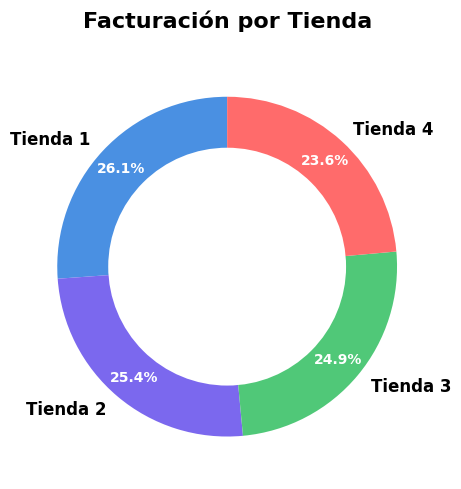


=== FACTURACIÓN POR TIENDA ===

Tienda 1: $1.150.880.400 (26.1%)
Tienda 2: $1.116.343.500 (25.4%)
Tienda 3: $1.098.019.600 (24.9%)
Tienda 4: $1.038.375.700 (23.6%)


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

facturaciones = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

fig, ax = plt.subplots(figsize=(5, 5))
colors = ['#4A90E2', '#7B68EE', '#50C878', '#FF6B6B']

wedges, texts, autotexts = ax.pie(facturaciones,
                                    labels=tiendas,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors,
                                    pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

for text in texts:
    text.set_fontsize(12)
    text.set_weight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

ax.set_title('Facturación por Tienda', fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.show()

# Resumen
print("\n=== FACTURACIÓN POR TIENDA ===\n")
total = sum(facturaciones)
for t, f in zip(tiendas, facturaciones):
    porcentaje = (f/total) * 100
    print(f"{t}: ${f:,.0f} ({porcentaje:.1f}%)".replace(",", "."))

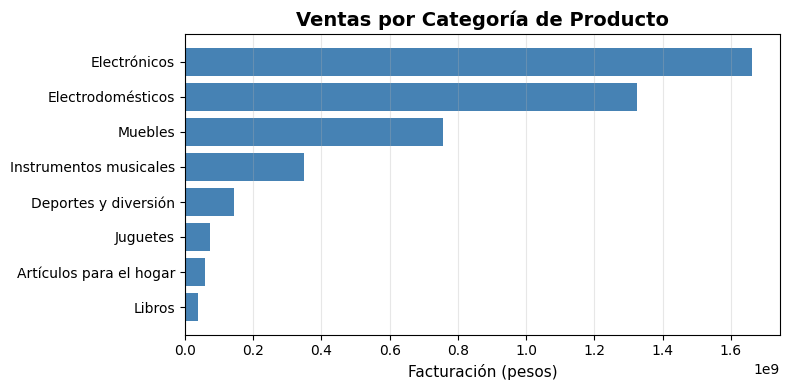


=== VENTAS POR CATEGORÍA ===

Electrónicos: $1.660.576.500
Electrodomésticos: $1.324.751.100
Muebles: $757.661.000
Instrumentos musicales: $348.772.600
Deportes y diversión: $142.977.700
Juguetes: $73.604.400
Artículos para el hogar: $57.579.800
Libros: $37.696.100


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.concat([tienda, tienda2, tienda3, tienda4])

categoria = df.groupby('Categoría del Producto')['Precio'].sum()
categoria = categoria.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(categoria.index, categoria.values, color='steelblue')

ax.set_title('Ventas por Categoría de Producto', fontsize=14, weight='bold')
ax.set_xlabel('Facturación (pesos)', fontsize=11)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen
print("\n=== VENTAS POR CATEGORÍA ===\n")
categoria_ordenada = categoria.sort_values(ascending=False)
for cat, valor in categoria_ordenada.items():
    print(f"{cat}: ${valor:,.0f}".replace(",", "."))

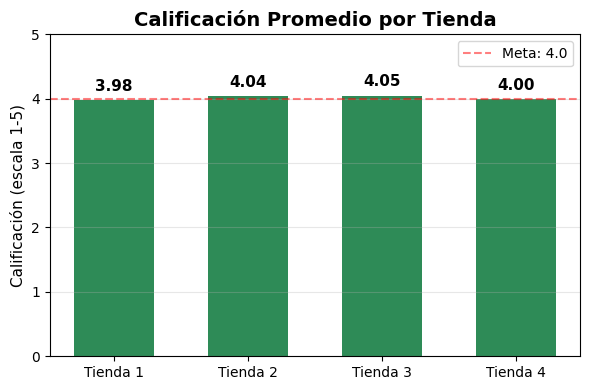


=== CALIFICACIÓN PROMEDIO POR TIENDA ===

Tienda 1: 3.98 estrellas
Tienda 2: 4.04 estrellas
Tienda 3: 4.05 estrellas
Tienda 4: 4.00 estrellas


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

calificaciones = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

fig, ax = plt.subplots(figsize=(6, 4))
barras = ax.bar(tiendas, calificaciones, color='seagreen', width=0.6)

ax.set_title('Calificación Promedio por Tienda', fontsize=14, weight='bold')
ax.set_ylabel('Calificación (escala 1-5)', fontsize=11)
ax.set_ylim(0, 5)
ax.grid(axis='y', alpha=0.3)

for barra, valor in zip(barras, calificaciones):
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2., altura + 0.1,
            f'{valor:.2f}', ha='center', va='bottom', fontsize=11, weight='bold')

ax.axhline(y=4.0, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='Meta: 4.0')
ax.legend()

plt.tight_layout()
plt.show()

# Resumen
print("\n=== CALIFICACIÓN PROMEDIO POR TIENDA ===\n")
for t, c in zip(tiendas, calificaciones):
    print(f"{t}: {c:.2f} estrellas")